# Grain Size Distribution - Height Correlation Function

Find relevant parameters to describe the topography of sputtered Ruthenium thin films on Si substrate

SEM images do not contain the height information, however they do provide informations regarding grain size distribution.

In [14]:
from skimage import data, io, util, segmentation, color, draw, filters
import numpy as np
from scipy import ndimage
%matplotlib nbagg
import matplotlib
from matplotlib import cm
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
from PIL import Image
import os 
import sys
import cv2
import pytesseract
from scipy.optimize import curve_fit


debug = True #or 'False' when you do not want to debug

path = "/Users/sfiligoj/Desktop/clean/High_Density_Ru/"
os.chdir(path)
filess= os.listdir()
filess = [f for f in filess if f.endswith('tif')]

<IPython.core.display.Javascript object>


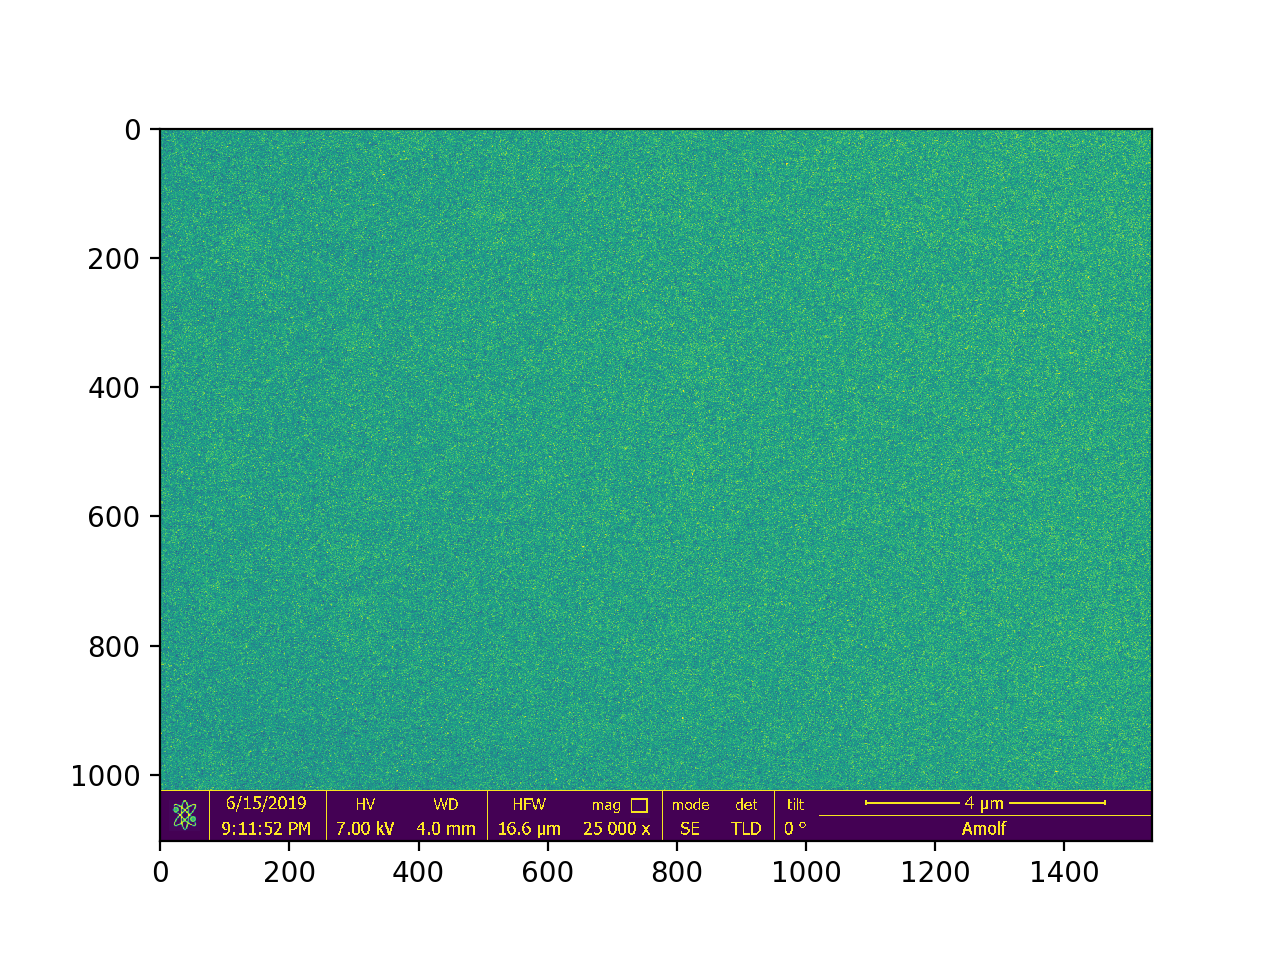

running file H_asdep_006.tif
running file H_700C_024.tif
running file H_700C_1um_047.tif
running file H_asdep_007.tif
running file H_asdep_005.tif
running file H_800C_10um_107.tif
running file H_250C_011.tif
running file H_700C_026.tif
running file H_250C_010.tif
running file H_asdep_004.tif
running file H_600C_1180nm_014.tif
running file H_700C_023.tif
running file H_asdep_001.tif
running file H_asdep_003.tif
running file H_800C_108.tif
running file H_800C_XPS_005.tif
running file H_700C_1um_042.tif
running file H_800C_XPS_004.tif
running file H_asdep_002.tif
running file H_500C_6um_033.tif
running file H_500C_019.tif
running file H_600C_1um_034.tif
running file H_500C_030.tif
running file H_600C_028.tif
running file H_600C_1um_037.tif
running file H_500C_1180nm_012.tif
running file H_600C_1um_018.tif
running file H_600C_1um_028.tif
running file H_250C_400nm_005.tif
running file H_700C_1um_038.tif
running file H_250C_300nm_008.tif
running file H_700C_1um_039.tif
running file H_250C_40

In [15]:
for i, file in enumerate(filess):
    
#     #choose one single temperature:
#     if '800C'in file:
#         temperature = file[3:7]
#     else:
#         continue
        
    if 'H' in file:
        density = 'High'
        if 'asdep' in file:
            temperature = 'as-deposited'
        else:
            temperature = file[2:6]
#     if 'L' in file:
#         density = 'Low' 
#         if 'asdep' in file:
#             temperature = 'as-deposited'
#         else:
#             temperature = file[2:6]
#     if 'LH' in file:
#         density = 'Low-to-High' 
#         if 'asdep' in file:
#             temperature = 'as-deposited'
#         else:
#             temperature = file[3:7]
    if '*' in file:
        continue 
    
    img = io.imread(file, as_gray=True) # .png number of channels = 4 : ( R G B alpha ) , alpha: transparency
    plt.imshow(img)
    plt.show()
    
    print(f'running file {file}')

In [16]:
# blueprint `filename = fov`
FOV_dict = {
    'L_800C_026.tif' : 829,
    'L_800C_027.tif' : 414,
    'L_800C_1h_137.tif'  : 16600,
    'L_800C_1h_135.tif'  : 11800,
    'L_800C_1h_134.tif'  :  1180,
    'L_800C_1h_142.tif'  :  1180,
    'L_800C_XPS_003.tif' :   345,
    'L_700C_300nm_058.tif' : 345,
    'L_700C_500nm_051.tif' : 518,
    'L_600C_024.tif' : 829,
    'L_500C_016.tif' : 829,
    'L_500C_015.tif' : 414, 
    'L_250C_011.tif' : 829,
    'L_asdep_002.tif': 829,
    
    'H_800C_10um_107.tif' : 11800,
    'H_800C_XPS_005.tif'  :   518,
    'H_800C_XPS_004.tif'  :  1180,
    'H_800C_XPS_008.tif'  :  1180,
    'H_800C_110.tif' :1180,
    'H_800C_111.tif' :1180,
    'H_800C_108.tif' :1180,
    'H_800C_104.tif' :1180,
    'H_700C_10um_043.tif':16600,
    'LH_800C_023.tif': 4830,
    'H_asdep_004.tif': 414,
    'H_asdep_005.tif': 414,
    'H_asdep_001.tif': 829,
    'H_asdep.tif'    : 414,
    'H_250C_009.tif':  518,
    'H_250C_008.tif':  829,
    'H_500C_500nm_031.tif':  518,
    'H_500C_5000nm_032.tif':6380,
    
    'LH_700C_096.tif': 1180,
    'LH_700C_095.tif':11800,
    'LH_700C_094.tif': 8290,
    'LH_700C_090.tif': 1180,
    'LH_700C_089.tif': 4140,
    'LH_700C_087.tif': 3450,
    'LH_700C_086.tif':20700,
    'LH_700C_083.tif': 5180,
    'LH_700C_082.tif':  518,
    'LH_700C_080.tif':11800,
    'LH_700C_078.tif': 1180,
    'LH_700C_076.tif':  518,
    'LH_700C_079.tif':16600,
    'LH_700C_077.tif':  414,
    'LH_700C_075.tif': 5180,
    'LH_700C_070.tif':16600,
    'LH_700C_072.tif': 1180,
    'LH_700C_073.tif':  829,
    'LH_700C_069.tif':11800,
    'LH_700C_068.tif': 5180,
    'LH_700C_092.tif': 4140,
    
    'LH_500C_011.tif': 4140
}

running file H_asdep_006.tif
limit=50729766.87230135
correlation length = 4.716796875
Cut-off=13
-16.655270465592157


<IPython.core.display.Javascript object>


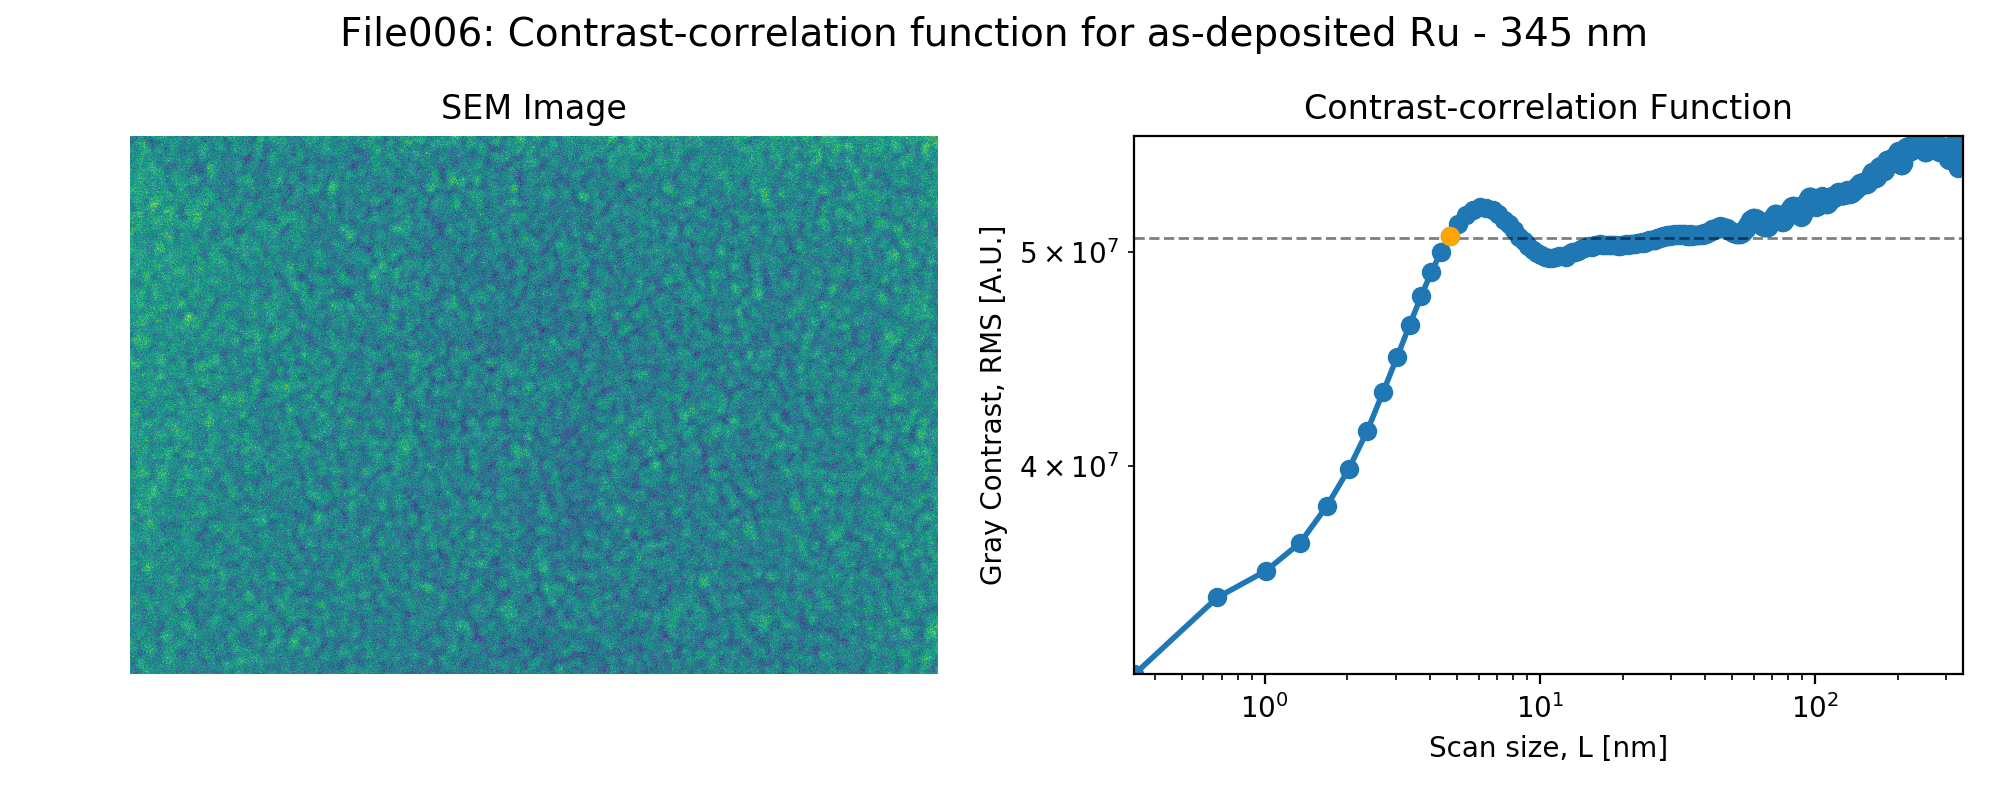

running file H_700C_024.tif
limit=67283480.82381041
correlation length = 33.38671875
Cut-off=65
0.033955078734083904


<IPython.core.display.Javascript object>


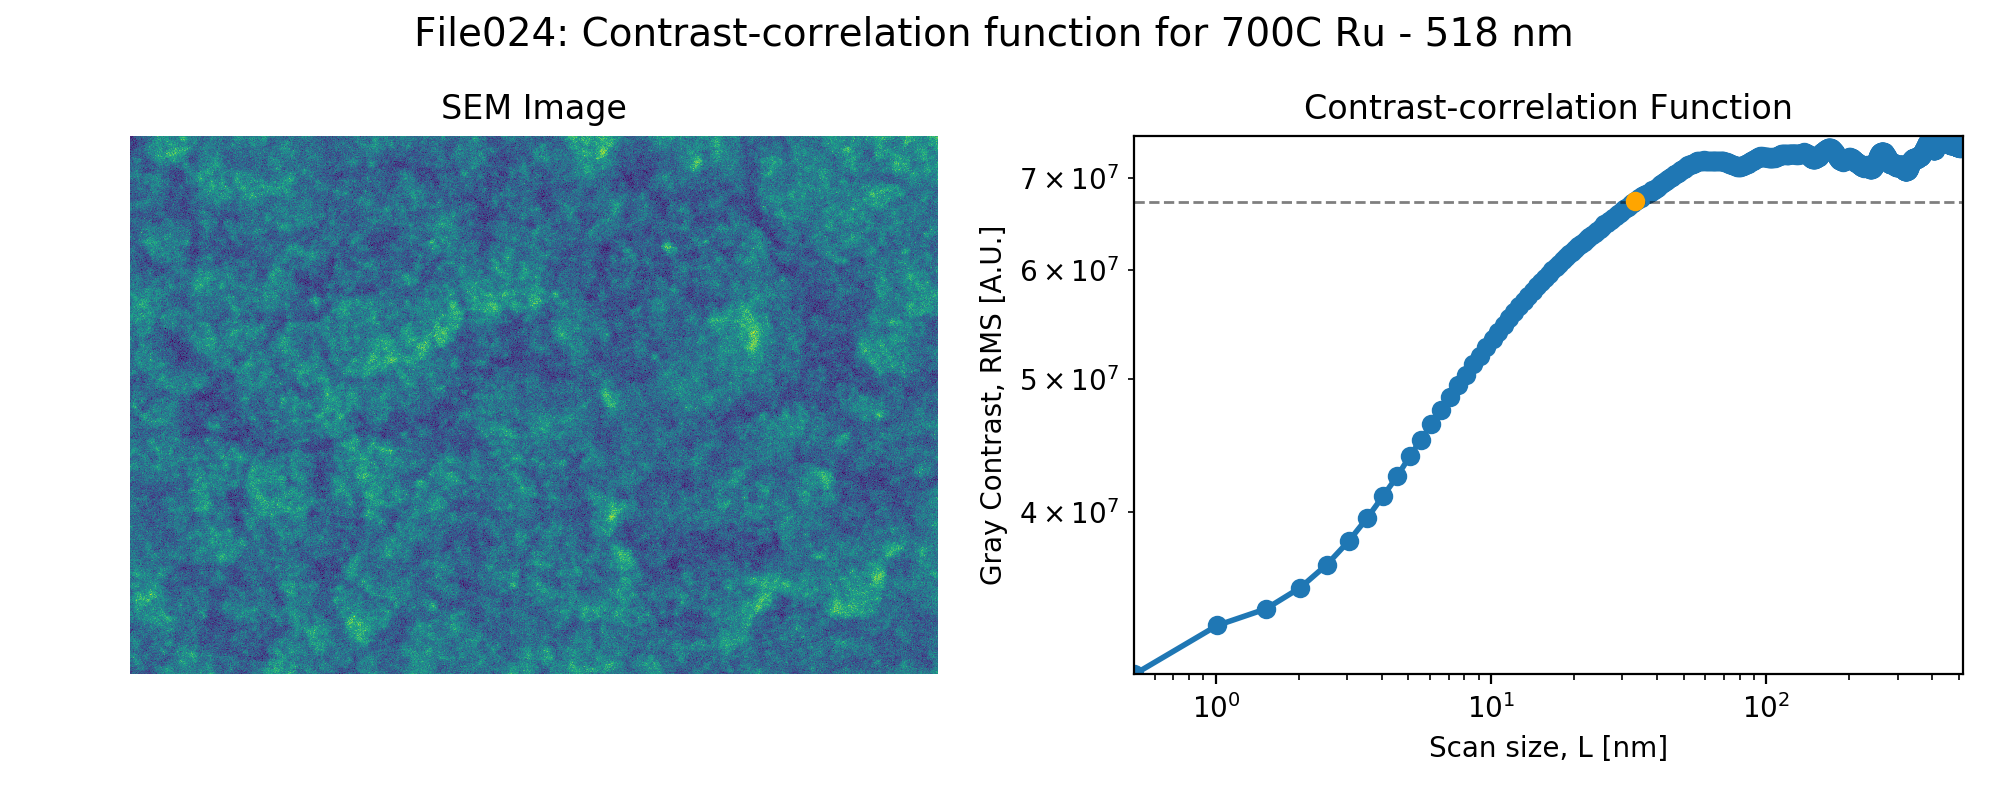

running file H_700C_1um_047.tif
limit=77657753.10598753
correlation length = 44.94140625
Cut-off=38
0.11977842334399283


<IPython.core.display.Javascript object>


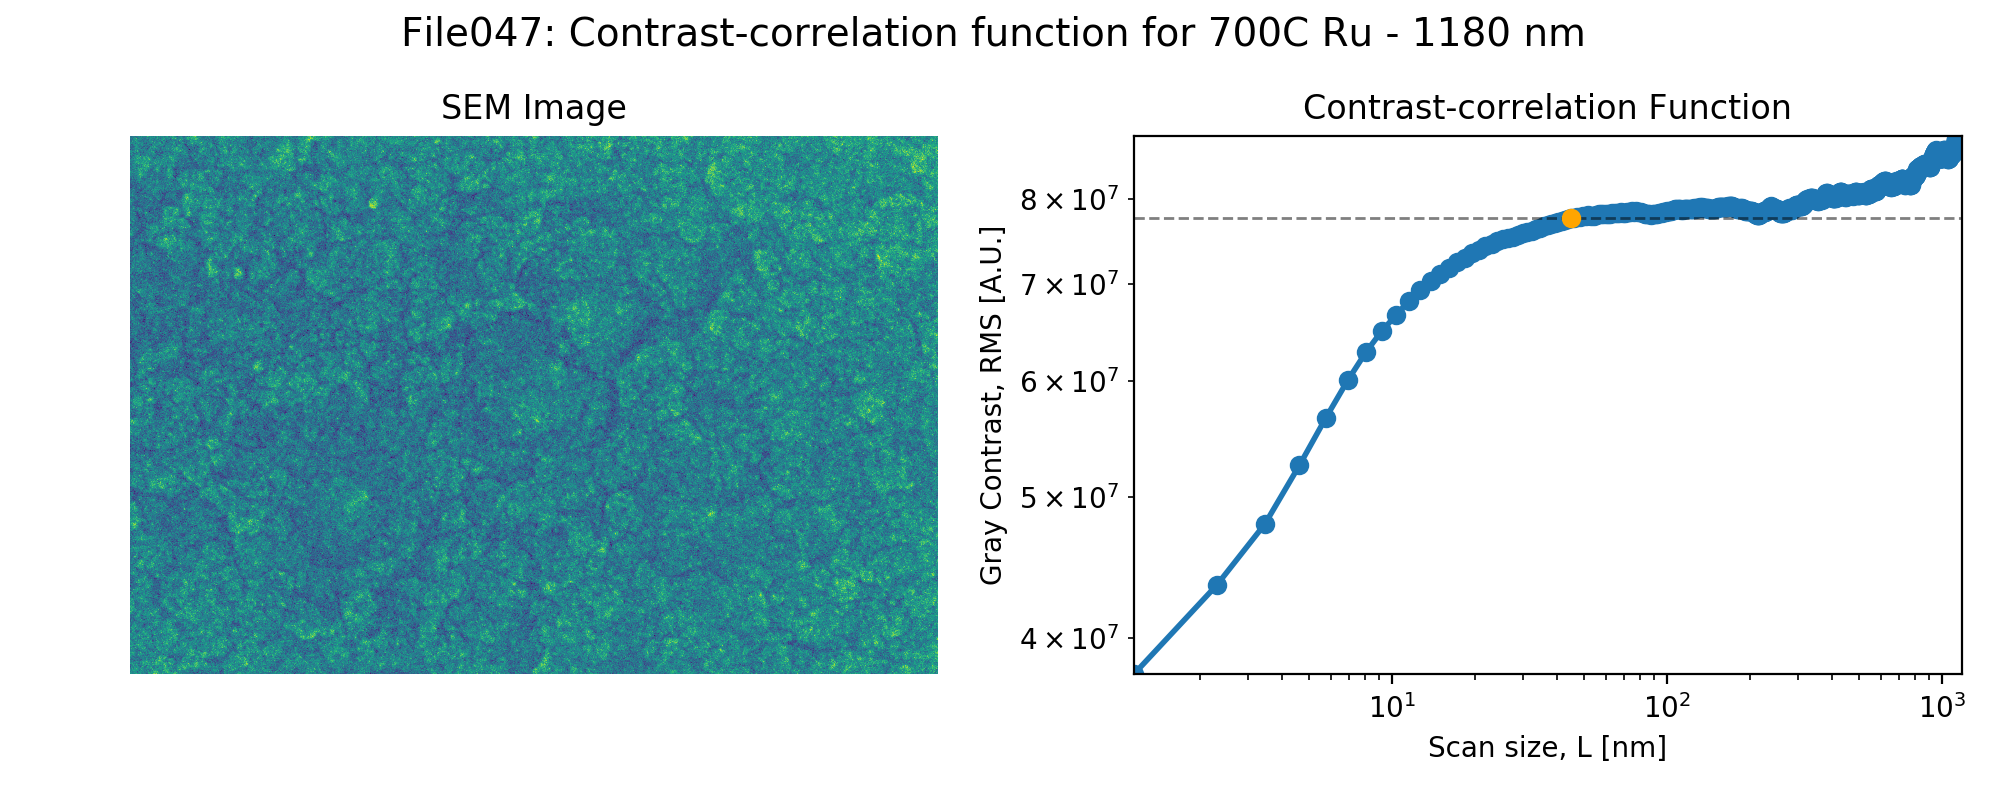

running file H_asdep_007.tif
limit=51208469.22554091
correlation length = 5.05859375
Cut-off=9
0.061560637377545975


<IPython.core.display.Javascript object>


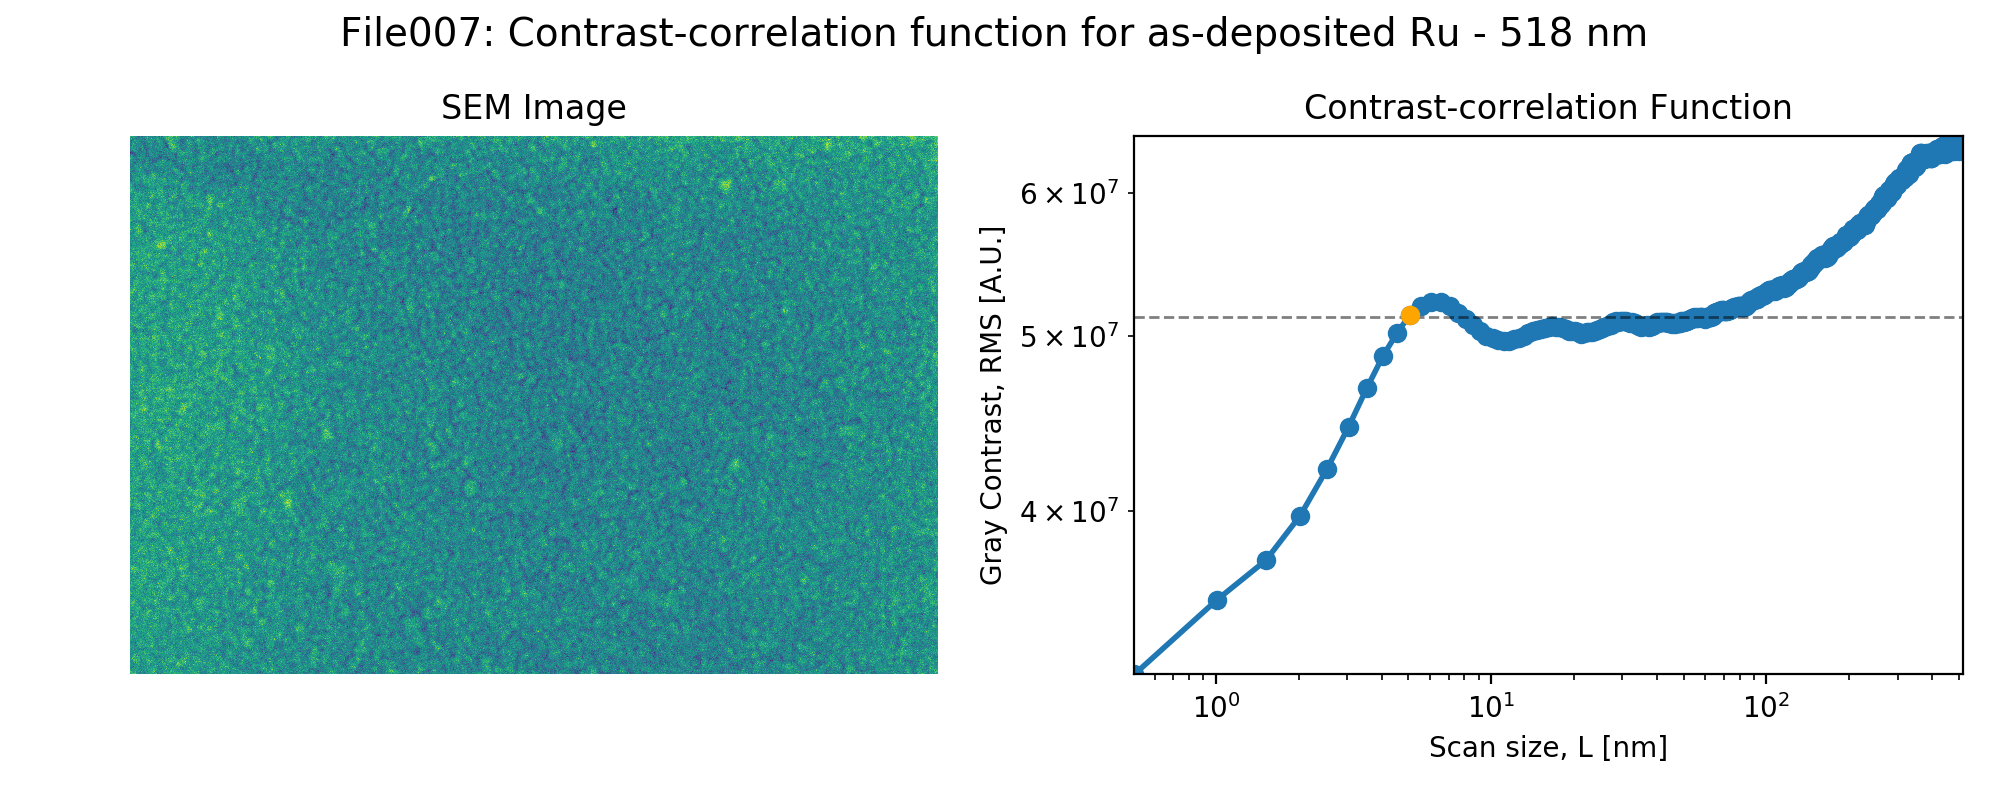

running file H_asdep_005.tif
limit=48710262.706510074
correlation length = 5.255859375
Cut-off=12
-25.386686046749215


<IPython.core.display.Javascript object>


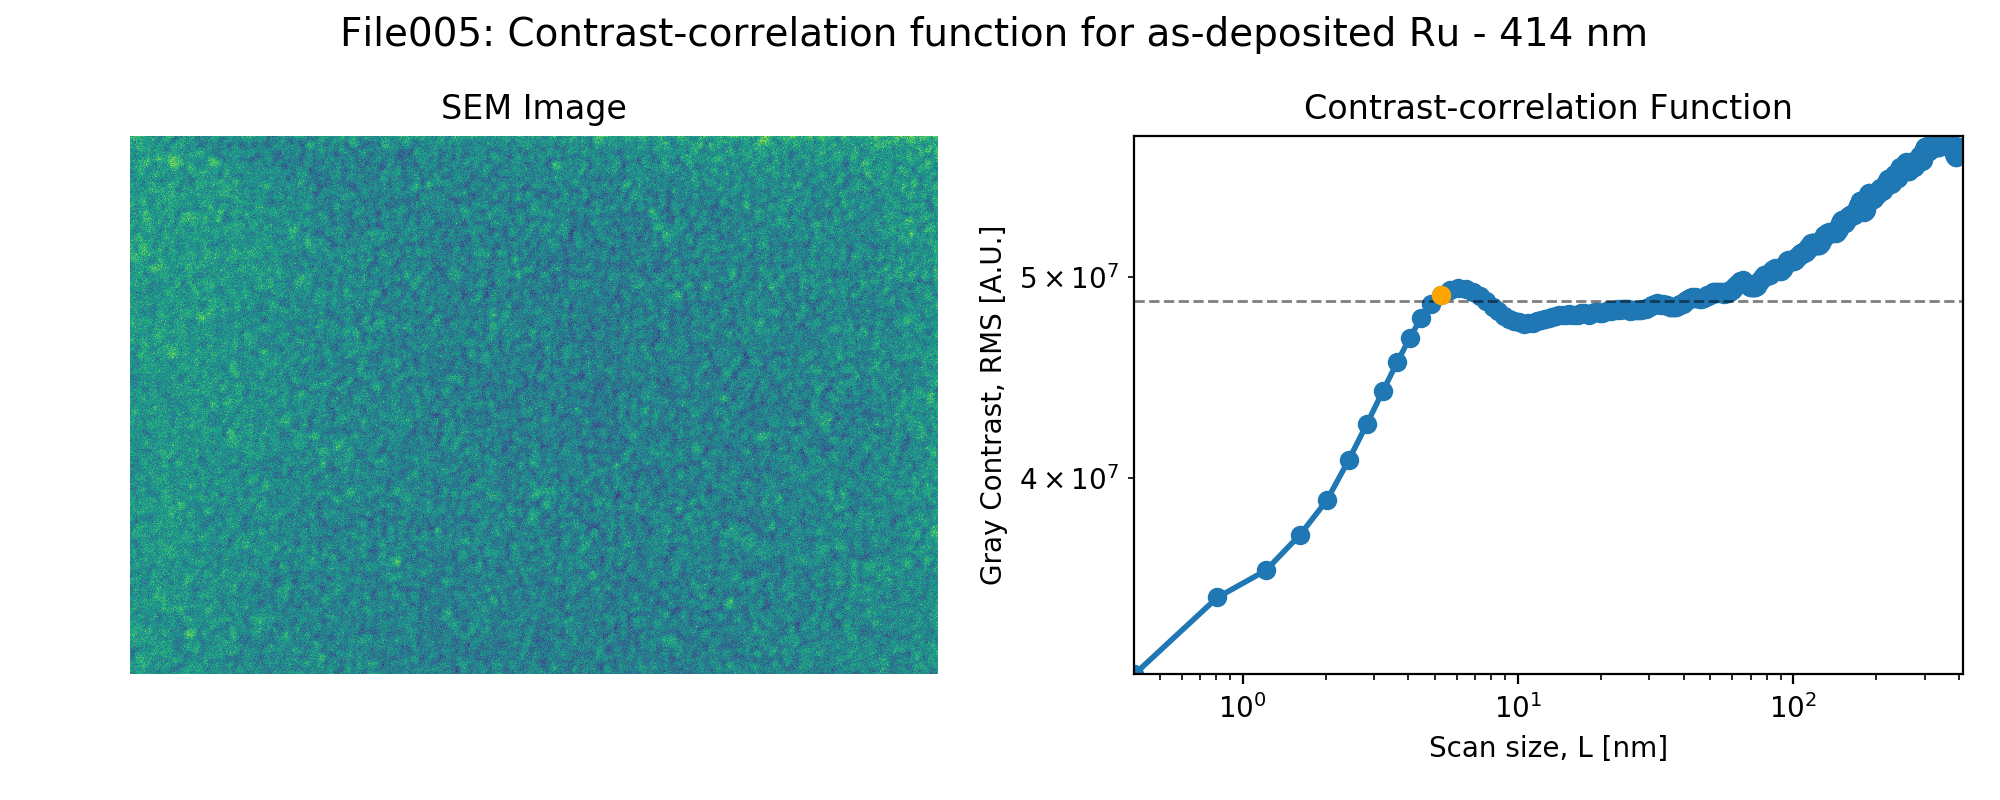

In [59]:
for i, file in enumerate(filess[:7]):
    
# # #     #choose one single temperature:
#     if '800C'in file:
#         temperature = file[3:7]
#     else:
#         continue
        
    if 'H' in file:
        density = 'High'
        if 'asdep' in file:
            temperature = 'as-deposited'
        else:
            temperature = file[2:6]
#     if 'L' in file:
#         density = 'Low' 
#         if 'asdep' in file:
#             temperature = 'as-deposited'
#         else:
#             temperature = file[2:6]
#     if 'LH' in file:
#         density = 'Low-to-High' 
#         if 'asdep' in file:
#             temperature = 'as-deposited'
#         else:
#             temperature = file[3:7]
    if '*' in file:
        continue 
        
        
    img = io.imread(file, as_gray=True) # .png number of channels = 4 : ( R G B alpha ) , alpha: transparency
    
    print(f'running file {file}')

    #Extract FOV from image:
    if file in FOV_dict:
        FOV = FOV_dict[file]
    else:
        FOV_img = img[1070:1100,520:575] # for most of them: img[1070:1100,520:575] for H_Ru_800C img[:, 528:598]   
        cfg ='--psm 7' 
        FOV_text = pytesseract.image_to_string(FOV_img, config =cfg)  

        
#         # HUMAN check
#         if len(FOV_text)<2:
            
#             FOV = input('Type FOV in nm: ')
#             FOV_dict[file] = FOV
#             plt.close('all')
#         else:
        if len(FOV_text)>3:
            FOV = int(float(FOV_text)*1000)
        if len(FOV_text)<4:   #select images in nm
            FOV = int(FOV_text)

    
    
    ScanSize = FOV
        
#     if debug: print(f'Reading in {filess}, with shape {img.shape}')
    img = np.copy(img[:1024,:])
    
    N_Pixel = img.shape[0]                              # before was len(data), which works in this case, but it would be the N of rows 
    
    StepSize = ScanSize/N_Pixel                          # nm/px
    Xdelta = np.linspace(StepSize, ScanSize, num=N_Pixel)

    HHcorr = np.zeros(N_Pixel, dtype='float')
    for px_dist in range(N_Pixel):
        shifted_img = img[:, px_dist+1:].astype(float)
        img_section = img[:, : -px_dist-1].astype(float)
        HHcorr[px_dist] = np.mean((img_section-shifted_img)**2)
        
    limit2 = np.mean(HHcorr[5:200])
    

    print(f'limit={limit2}')

    for j in range(len(Xdelta)):
            if HHcorr[j]>limit2:
                corrlength = Xdelta[j] 
                corrvalue = HHcorr[j]
                # print(f'XDelta={Xdelta[j]},{j}')
                break


    print(f'correlation length = {corrlength}')
    
    CutoffPointPLaw = int(np.argwhere(HHcorr>=limit2)[0])
    print(f'Cut-off={CutoffPointPLaw}')
    error = np.arange(1,CutoffPointPLaw+1)**2
    weights = np.exp(error)

    Model = lambda x, a, alpha: a*x**(2*alpha)
    popt, pcov = curve_fit(Model, Xdelta[1:CutoffPointPLaw+1], HHcorr[1:CutoffPointPLaw+1], sigma = weights)
      
    #*popt= a,alpha
    a = popt[0]                                         # primo parametro dipendente
    alpha = popt[1]                                     # secondo paramtero dipendente
    print(alpha)


    # ***    Plot what you got   ***   

    #For all the beautiful colors go to   http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=4
    #                                   &  https://www.quackit.com/css/css_color_codes.cfm

    #to have different subplots add:
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (10,4))
    ax = np.ravel(ax)

    ax[0].imshow(img, cmap='viridis')
    ax[0].axis('off')
    ax[0].set_title(f"SEM Image")
    
    # plot the data
    ax[1].scatter(corrlength, corrvalue, marker='o', color='orange', zorder=10)
    ax[1].loglog(Xdelta, HHcorr, label = 'HH corr', linewidth = 2, alpha=1, marker ='o',zorder=1)
            #and its errors:
            #plt.errorbar(Xdelta, HHcorr, yerr=e, fmt=".")

    ax[1].axhline(y=limit2, linestyle="dashed",linewidth = 1, color = 'black', zorder =5, alpha =0.5)


    ax[1].set(ylabel='Gray Contrast, RMS [A.U.]')
    ax[1].set(xlabel='Scan size, L [nm]')
    ax[1].set_title(f"Contrast-correlation Function")  
    
    ax[1].set_xlim(Xdelta[0], ScanSize)
    ax[1].set_ylim(HHcorr[0], max(HHcorr))

        
    fig.tight_layout()
    
    sup_title = f"File{file[-7:-4]}: Contrast-correlation function for {temperature} Ru - {FOV} nm "
    fig.suptitle(sup_title, fontsize=14)
    fig.subplots_adjust(top=0.83)
  
    figname = f"{sup_title}.png"
    
    plt.savefig(f'Contrast correlation function for {temperature} {density} density Ru - {file[-7:-4]}.png', dpi=600)
    
#     text = open(f"Values for {temperature} {density} density Ruthenium.txt","a")
#     text.write(f'\n Filename = {file} \n ScanSize = {ScanSize} nm \n Correlation length = {corrlength:.3} nm \n')
#     text.close()
    
    

    